<a href="https://colab.research.google.com/github/Bibhukalyan/MvvmPractice/blob/master/cc_fraud_detection_Bibhukalyan_Ojha_m22ai537.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import read_csv
from google.colab import drive
import matplotlib.pyplot as plt#python library used for plotting
import sklearn #lib used for classification, regression, clustering, SVM analysis
import scipy
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest #isolates the outliers by selecting a feature randomly and then selecting asplit value between min and max values of the feature
from pylab import rcParams
rcParams['figure.figsize'] = 14,8#fixing the size of figures
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]#labelling into two categories Normal and Fraud

drive.mount('/content/drive')
#path = '/content/drive/MyDrive/Classroom/Introduction to Data Science DCS/Project on creditcard fraud detection/card_transdata.csv'
cc_data_set = pd.read_csv('/content/drive/My Drive/cc_fraud_detect_project/card_transdata.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cc_data_set.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
cc_data_set.shape #shape of the data
#cc_data_set.info()
#cc_data_set.describe()

(1000000, 8)

In [ ]:
cc_data_set.isnull().values.any() #checking for any null data present

False

In [ ]:
LABELS = ["Normal", "Fraud"]#Labeling into 2 category fraud or nornaml data

In [ ]:
count_classes = pd.value_counts(cc_data_set['fraud'], sort = True)
fraud = cc_data_set[cc_data_set['fraud']==1] #segrigated data into 2 parts fraud and normal (1 is for fraud)(0 is for noral)
normal = cc_data_set[cc_data_set['fraud']==0]

In [ ]:
print(fraud.shape,normal.shape)#printing shape of the data's

(87403, 8) (912597, 8)


In [ ]:
fraud.ratio_to_median_purchase_price.describe() #description of fraud data

count    87403.000000
mean         6.006323
std          5.564320
min          0.011966
25%          3.500270
50%          5.071294
75%          7.331222
max        266.689692
Name: ratio_to_median_purchase_price, dtype: float64

In [ ]:
normal.ratio_to_median_purchase_price.describe() #description of normal data

count    912597.000000
mean          1.423642
std           1.946152
min           0.004399
25%           0.449768
50%           0.913950
75%           1.788918
max         267.802942
Name: ratio_to_median_purchase_price, dtype: float64

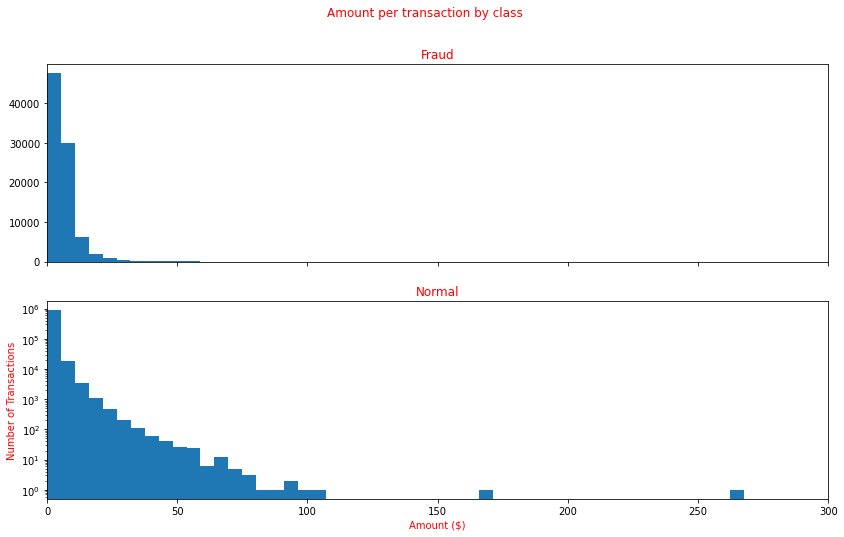

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)#to print subplots
f.suptitle('Amount per transaction by class',color='Red')
bins = 50 #storing binary of 50
#plotting histograms
ax1.hist(fraud.ratio_to_median_purchase_price, bins = bins)#for plotting subplot 1
ax1.set_title('Fraud',color='Red')#title for subplot 1
ax2.hist(normal.ratio_to_median_purchase_price, bins = bins)#for plotting subplot 2
ax2.set_title('Normal',color='Red')#subplot 2 title
plt.xlabel('Amount ($)',color="Red")#label for x axis
plt.ylabel('Number of Transactions',color='Red')#label for y axis
plt.xlim((0, 300))#limit for x axis(highest value)
plt.yscale('log')
plt.show();#showing the plot

In [ ]:
data_frac = cc_data_set.sample(frac = 0.1, random_state = 1)#frac=0.1 is 0.1 fraction of axis items to return, random_state =1 is seeding for Random value.
data_frac.shape #shape of the random sample

(100000, 8)

Text(0, 0.5, 'Frequency')

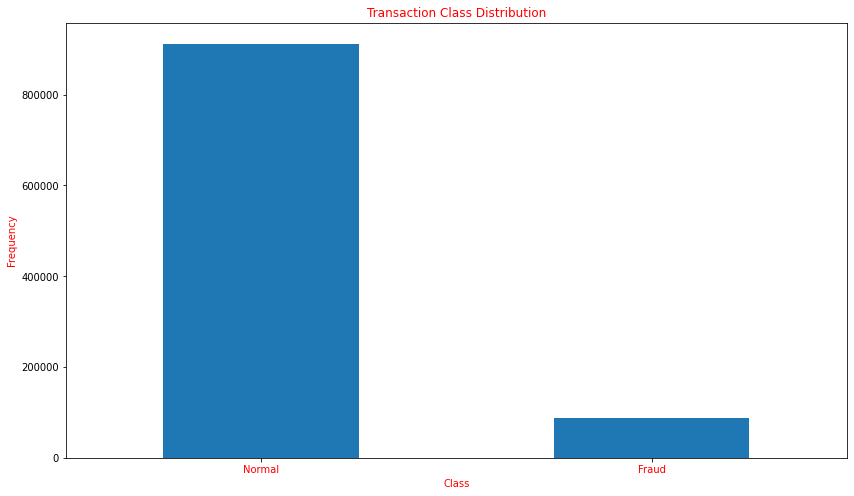

In [ ]:
count_classes = pd.value_counts(cc_data_set['fraud'], sort = True)#plotting how many transactions(fraud or normal) as labelled in data set
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution",color='Red')
plt.xticks(range(2), LABELS,color='Red')#heading
plt.xlabel("Class",color='Red')#left label
plt.ylabel("Frequency",color='Red')#down label

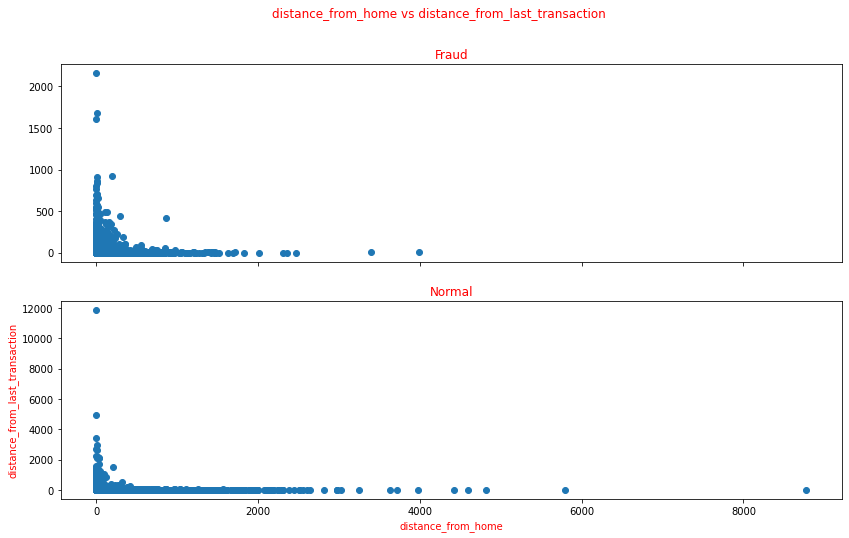

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)#to print subplots in scatter plot
f.suptitle('distance_from_home vs distance_from_last_transaction',color='Red')#heading title
ax1.scatter(fraud.distance_from_home, fraud.distance_from_last_transaction)#plotting scatter plot for subplot 1
ax1.set_title('Fraud',color='Red')#subplot 1 title
ax2.scatter(normal.distance_from_home, normal.distance_from_last_transaction)#second scatterplot subplot
ax2.set_title('Normal',color='Red')#title for second subplot
plt.xlabel('distance_from_home',color='Red')#label for x axis
plt.ylabel('distance_from_last_transaction',color='Red')#label for y axis
plt.show()

In [ ]:
fraud = data_frac[data_frac['fraud']==1] #fraud =1 denoting fradulent transaction data from the random sample
valid = data_frac[data_frac['fraud']==0] #fraud =0 denoting normal transaction data from the random sample
outlier_fraction = len(fraud)/float(len(valid))#fraction or ratio of fraud is to valid is calculated
print(outlier_fraction)

0.09674376775353974


In [ ]:
print("Fraud Cases : {}".format(len(fraud)))#no of fraud cases from random sample
print("Valid Cases : {}".format(len(valid)))#no of normal cases from random sample

Fraud Cases : 8821
Valid Cases : 91179


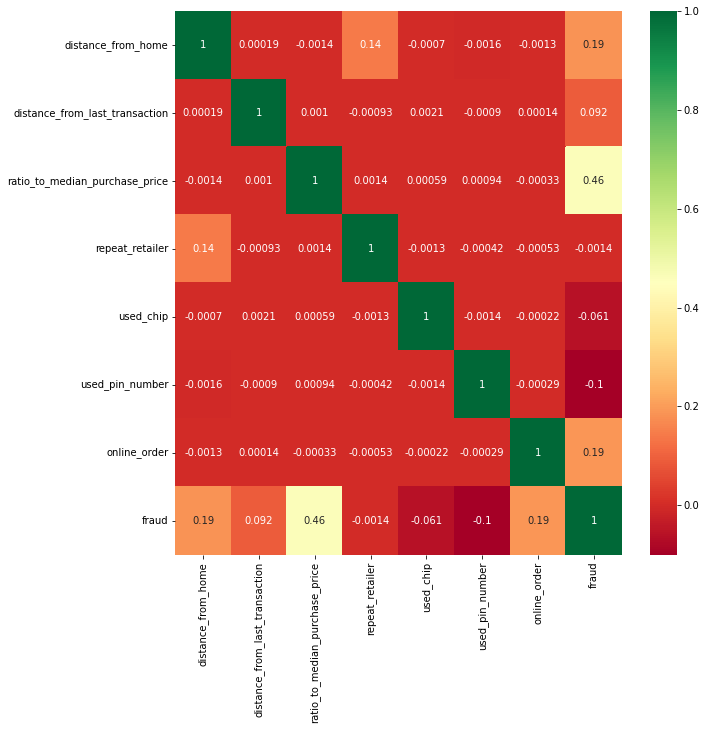

In [ ]:
corrmat = data_frac.corr()#calculating correlation coefficient
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(cc_data_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
columns = data_frac.columns.tolist()
columns = [c for c in columns if c not in ["fraud"]]
#Store the variable we are predicting
target = "fraud"#our prediction is class , class 0 and class 1 i.e fraud and not fraud
#Defining a random state
state = np.random.RandomState(42)#using for pseudo random number generation
X = data_frac[columns]#loading X
Y = data_frac[target]#loading Y
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0], X.shape[1]))#drawing a sample from a uniform distribution. every value has  equal probability of being taken
#Printing the shapes of X and Y
print(X.shape)
print(Y.shape)

(100000, 7)
(100000,)


In [ ]:
classifier = IsolationForest(n_estimators = 100, max_samples = len(X),contamination = outlier_fraction, random_state = state, verbose=0)
#Isolation forest is a algorithm used in Machine learning that is used to detect anomally
#it detects anomally by isolation
#example say there are 10 points 1 to 10 and all from 1 to 9 are clustered in nearby region but one point point 10 is separated 
#from other cluster of points. So this algorithm detects that how far this point is away from the cluster and tells this point is anomally or not
type(classifier)#type of our classifier is Isolation forest
#here the alternative algorithms that we can use except Isolation Forest algorithms are Robust Covarience, One class SVM,Local outlier factor.
import warnings
warnings.filterwarnings("ignore")  #during running our code warnings may come.Here explicitly we are shutting up the warnings 
n_outliers = len(fraud)
#Fitting data and tagging outliers
classifier.fit(X)#training the model on training data
scores_prediction = classifier.decision_function(X)#using desicion_function function for prediction
y_pred = classifier.predict(X)
#Reshape the prediction values to 0 for valid transactions, 1 for fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y).sum()
#Running the Classification Metrics 
print("The number of Credit Card fraud cases as per the dataset are:","{}: {}".format(classifier,n_errors),sep=' ')
print()
print("Accuracy Score:", accuracy_score(Y,y_pred), sep=' ')
print() 
print("Accuracy Percentage of the Machine Learning Model:", accuracy_score(Y,y_pred)*100, sep=' ')
print()
print("                       Classification Report                       ")
print()
print(classification_report(Y,y_pred))

The number of Credit Card fraud cases as per the dataset are: IsolationForest(contamination=0.09674376775353974, max_samples=100000,
                random_state=RandomState(MT19937) at 0x7F0744B4A7C0): 14698

Accuracy Score: 0.85302

Accuracy Percentage of the Machine Learning Model: 85.302

                       Classification Report                       

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92     91179
         1.0       0.20      0.22      0.21      8821

    accuracy                           0.85    100000
   macro avg       0.56      0.56      0.56    100000
weighted avg       0.86      0.85      0.86    100000



# **As the above result is not satisfactoy, accuracy is only 85.3% checking for other approaches**

In [ ]:
x=cc_data_set.iloc[:,:-1] #taking all featres except last one and assigning to x
x.head()
y=cc_data_set.iloc[:,-1] #last column of data frame assigned to y
x.shape,y.shape

((1000000, 7), (1000000,))

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=23)#splitting training and testing data set
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape


((800000, 7), (200000, 7), (800000,), (200000,))

In [ ]:
tree=DecisionTreeClassifier()# decision tree classfier algorith is used
tree.fit(xtrain,ytrain)
tree_predict=tree.predict(xtest)
tree_accuracy=accuracy_score(tree_predict,ytest)
print(tree_accuracy)

0.999985


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
knn_predict=knn.predict(xtest)

In [ ]:
knn_accuracy=accuracy_score(knn_predict,ytest)
print(knn_accuracy)

0.98576


In [ ]:
rf=RandomForestClassifier(n_estimators=10)
rf.fit(xtrain,ytrain)
rf_predict=rf.predict(xtest)
rf_accuracy=accuracy_score(rf_predict,ytest)
print('Accuracy using Decision tree :',(accuracy_score(tree_predict,ytest)*100))
print('Accuracy using Random forest :',(accuracy_score(rf_predict,ytest)*100))
print('Accuracy using Knn :',(accuracy_score(knn_predict,ytest)*100))

Accuracy using Decision tree : 99.9985
Accuracy using Random forest : 100.0
Accuracy using Knn : 98.576
